In [1]:
#setting parameters
import random
import math
p=0.9#the threshold of probability 
N=100#number of nodes in the graph
disthres=0.12
from Connect import is_connect,find_component

In [2]:
#generating the tested graph
#the existence of the edge between any two nodes is subjected to an uniform distribution on (0,1)
a=[0]*N
b=[0]*N
for x in range(N):
    a[x]=random.uniform(0,1)
    b[x]=random.uniform(0,1)
mat=[]#adjacent matrix
for x in range(N):
	mat.append([0]*N)
for x in range(N):
	for y in range(x+1,N):
		if random.uniform(0,1)<p and math.sqrt((a[x]-a[y])**2+(b[x]-b[y])**2)<disthres:
			mat[x][y]=1
			mat[y][x]=1

In [3]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
#test if the graph is connected
import matplotlib.pyplot as plt
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
is_connect(mat)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


The graph is not connected


0,31,68,82,93,58,81,84,40,53,73,76,86,26,38,75,20,83,50,78,74,72,11,16,80,17,60,91,39,3,22,30,36,4,48,51,63,89,5,27,7,29,95,34,94,43,10,37,44,87,1,15,97,57,98,55,2,54,67,88,62
6
8,45,96,23,28,61,85,52,70,77,41
9,14,18,35,47,69,42,64
12,13,19,49,59,92,33,32
21,24,25,71,99,56
46
65
66
79,90


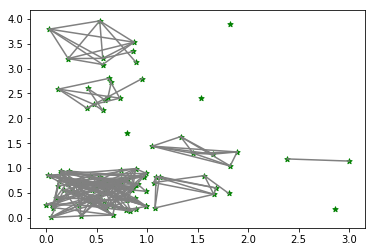

In [5]:
#find all the connected components in a graph
comp=find_component(mat)
numcomp=len(comp)
m=math.ceil(math.sqrt(numcomp))
xpos=[0]*N
ypos=[0]*N
for k in range(m):
    for r in range(m):
        ind=k*m+r
        if ind<numcomp:
            for nt in comp[ind]:
                xpos[nt]=random.uniform(k,k+1)
                ypos[nt]=random.uniform(r,r+1)
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
            

The component consisting of the nodes:

0,31,68,82,93,58,81,84,40,53,73,76,86,26,38,75,20,83,50,78,74,72,11,16,80,17,60,91,39,3,22,30,36,4,48,51,63,89,5,27,7,29,95,34,94,43,10,37,44,87,1,15,97,57,98,55,2,54,67,88,62
has a cycle consisting of the nodes:

31,68,0
The component consisting of the nodes:

6
has no cycle

The component consisting of the nodes:

8,45,96,23,28,61,85,52,70,77,41
has a cycle consisting of the nodes:

23,61,45
The component consisting of the nodes:

9,14,18,35,47,69,42,64
has a cycle consisting of the nodes:

18,35,9
The component consisting of the nodes:

12,13,19,49,59,92,33,32
has a cycle consisting of the nodes:

13,19,12
The component consisting of the nodes:

21,24,25,71,99,56
has a cycle consisting of the nodes:

24,25,21
The component consisting of the nodes:

46
has no cycle

The component consisting of the nodes:

65
has no cycle

The component consisting of the nodes:

66
has no cycle

The component consisting of the nodes:

79,90
has no cycle



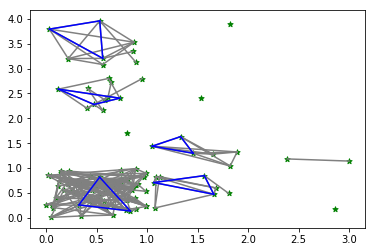

In [6]:
#find for each connected component if there is any cycle
from CycleGen_E import detect_cycle_gen
res=detect_cycle_gen(mat)
comp=res[0]
cmpcycle=res[1]
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
for cycle in cmpcycle:
    if cycle!=[]:
        for t in range(len(cycle)-1):
            x=cycle[t]
            y=cycle[t+1]
            if mat[x][y]==1:
                plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")
        x=cycle[len(cycle)-1]
        y=cycle[0]
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")